In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("..\\Dataset\\reccomender.csv")
x = df[['age','weight(kg)','height(m)','gender','BMI','BMR','activity_level']]
y = df.calories
print("x: \n", x.count(), end="\n\n")
print("y: \n", y.count(), end="\n\n")

x: 
 age               10726
weight(kg)        10726
height(m)         10726
gender            10726
BMI               10726
BMR               10726
activity_level    10726
dtype: int64

y: 
 10726



In [2]:
# Creazione dell'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle variabili categoriche come valori numerici
x_encoded = x.copy()

x_encoded['age'] = label_encoder.fit_transform(x['age'])
x_encoded['weight(kg)'] = label_encoder.fit_transform(x['weight(kg)'])
x_encoded['height(m)'] = label_encoder.fit_transform(x['height(m)'])
x_encoded['gender'] = label_encoder.fit_transform(x['gender'])
x_encoded['activity_level'] = label_encoder.fit_transform(x['activity_level'])
x_encoded['BMR'] = label_encoder.fit_transform(x['BMR'])
x_encoded['BMI'] = label_encoder.fit_transform(x['BMI'])

In [3]:
# Creazione di un oggetto StandardScaler
scaler = StandardScaler()

# Trasformazione e adattamento dei dati di addestramento
x_scaled = scaler.fit_transform(x_encoded)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Suddivisione iniziale in set di addestramento + convalida e test
x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Ulteriore suddivisione del set di addestramento + convalida in set di addestramento e convalida
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, random_state=42)


In [88]:
import os
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import IsolationForest

 
#model = xgb.XGBRegressor()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor(n_estimators=70)
#model = AdaBoostRegressor()
#model = GradientBoostingRegressor()
#model = lgb.LGBMRegressor()
model= ExtraTreesRegressor()
#model = IsolationForest(contamination=0.2)
#Lo proveremo con il modello più performante
#model = BaggingRegressor(base_estimator=base_regressor) 

model.fit(x_train, y_train)

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [89]:
# Calcolo delle previsioni
y_pred = model.predict(x_val)

# Calcolo del MSE
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)


Mean Squared Error: 4.634166608207566
Root Mean Squared Error: 2.1527114549348143
r2: 0.9999685894780841


Distanza tra y_val e y_pred: 8160     0.060300
3600     0.022932
4318     0.122005
2641     0.181077
10659    0.373140
           ...   
8499     0.108150
6391     0.033326
7764     0.013440
7059     0.327492
6547     0.075195
Name: calories, Length: 2253, dtype: float64


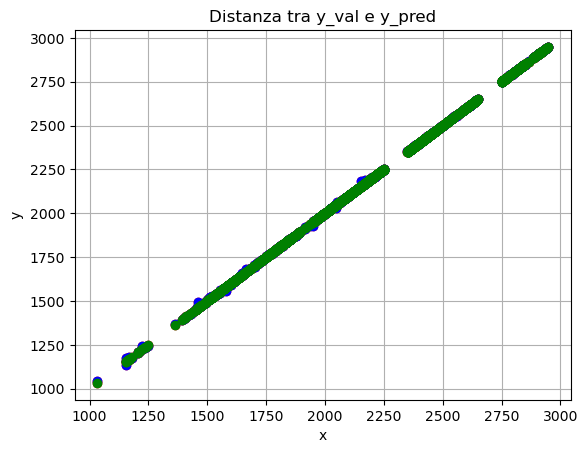

In [90]:
#distanza tra x_val e y_pred
import math
distanza = abs(y_pred - y_val)

print("Distanza tra y_val e y_pred:", distanza)
plt.plot([y_val, y_val], [y_val, y_pred], 'ro-', label='Distanza')
plt.plot(y_val, y_pred, 'bo', label='Valore predetto')
plt.plot(y_val, y_val, 'go', label='Valore di x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distanza tra y_val e y_pred')
plt.grid(True)
plt.show()


## GRID SEARCH

In [91]:

params = {'n_estimators': [50,100,200,500],
          'warm_start':[True,False],
          'max_features':['sqrt', 'log2', None]}

clf_optimized = GridSearchCV(model,param_grid=params,cv=10,n_jobs=n_cpu-1,refit=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Migliori iperparametri: {'max_features': None, 'n_estimators': 500, 'warm_start': True}


In [92]:
# Assegnazione dei migliori parametri al classificatore
best_params = clf_optimized.best_params_
model.set_params(**best_params)
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features=None, n_estimators=500, warm_start=True)

In [93]:
# Calcolo delle previsioni
y_pred = model.predict(x_test)

# Calcolo del MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("r2:", r2)

Mean Squared Error: 5.300291682751531
Root Mean Squared Error: 2.3022362352181696
r2: 0.9999661897926603


In [95]:
print(model.predict([[3,17.76999260194176,1.0347295405014274,1,16.59715122620208,987.396,1.9]]))

[2886.7909742]
